# Third Project
For Zoomcamp

## prepare environment

In [144]:
# run pip to get requirement.txt
!pip install -r requirements.txt

# libraries

In [145]:
#import main libraries

#processing & viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import auc, roc_curve

# Data prep, clean & vizi

In [146]:
# load & show
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
1,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
2,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
3,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
4,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
744,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
745,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
746,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
747,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Rename headers

In [147]:
df = df.rename(columns={'Product ID':'product_id', 'Air temperature [K]':'air_temperature', 'Process temperature [K]':'process_temperature', 'Rotational speed [rpm]':'rot_speed', 'Torque [Nm]':'torque','Tool wear [min]':'tool_wear','Failure Type':'fail_type','Type':'type','Target':'target' })
del df['UDI']

In [148]:
df

,product_id,type,air_temperature,process_temperature,rot_speed,torque,tool_wear,target,fail_type
0,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
1,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
2,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
3,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
4,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...
744,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
745,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
746,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
747,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Check NaN

In [149]:
# Checking NaNs
df.isna().sum()

product_id             0
type                   0
air_temperature        0
process_temperature    0
rot_speed              0
torque                 0
tool_wear              0
target                 0
fail_type              0
dtype: int64

clean database, nice

## Data info

In [150]:
print("Database contains %d data from %d unique machines" %(len(df),len(df["product_id"].unique())))

Database contains 749 data from 749 unique machines


## Machine types:

<AxesSubplot:ylabel='type'>

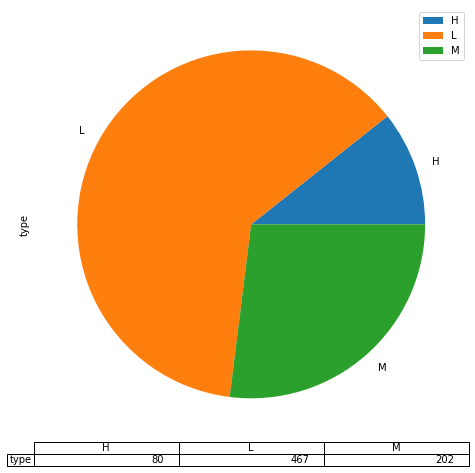

In [151]:
df.groupby(["type"])[["type"]].count().plot.pie(y="type",table=True,figsize=(10,8))

## Failure type

<AxesSubplot:ylabel='fail_type'>

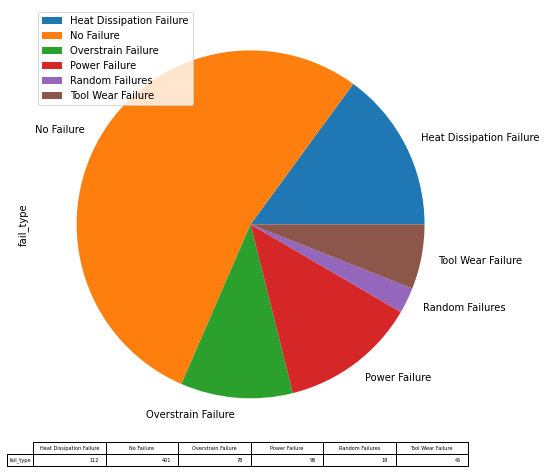

In [152]:
df.groupby(["fail_type"])[["fail_type"]].count().plot.pie(y="fail_type",table=True,figsize=(10,8))

## Temperatures

<AxesSubplot:title={'center':'Air Temperature (°K)'}, ylabel='Frequency'>

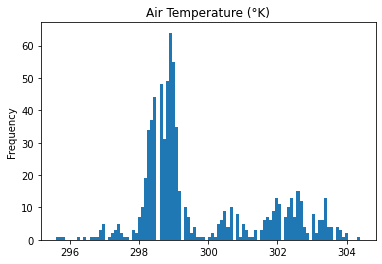

In [153]:
df["air_temperature"].plot.hist(title="Air Temperature (°K)",bins=100)

<AxesSubplot:title={'center':'Process Temperature (°K)'}, ylabel='Frequency'>

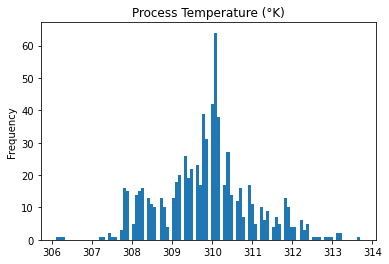

In [154]:
df["process_temperature"].plot.hist(title="Process Temperature (°K)",bins=100)

## Rotational speed

<AxesSubplot:title={'center':'Rotational Speed (RPM)'}, ylabel='Frequency'>

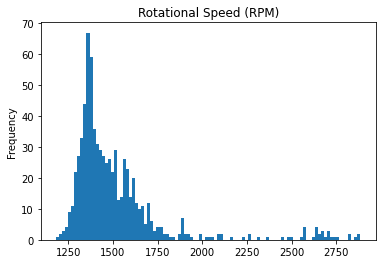

In [155]:
df["rot_speed"].plot.hist(title="Rotational Speed (RPM)",bins=100)

## Torque

<AxesSubplot:title={'center':'Torque (Nm)'}, ylabel='Frequency'>

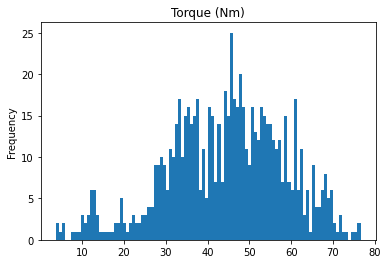

In [156]:
df["torque"].plot.hist(title="Torque (Nm)",bins=100)

## Tool wear

<AxesSubplot:title={'center':'Tool Wear (mins)'}, ylabel='Frequency'>

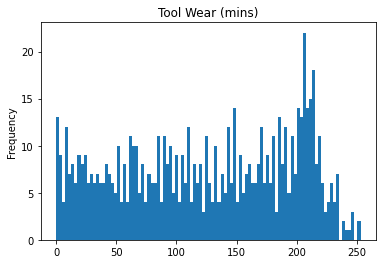

In [157]:
df["tool_wear"].plot.hist(title="Tool Wear (mins)",bins=100)

# Target

<AxesSubplot:ylabel='target'>

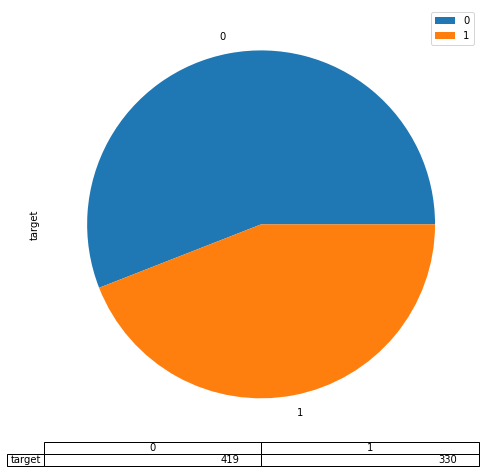

In [158]:
df.groupby(["target"])[["target"]].count().plot.pie(y="target",table=True,figsize=(10,8))

## Data description

In [159]:
df.describe()

,air_temperature,process_temperature,rot_speed,torque,tool_wear,target
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,299.731642,309.849800,1519.867824,44.367156,124.379172,0.440587
std,1.783683,1.162213,288.848678,14.137177,70.430365,0.496789
min,295.600000,306.100000,1181.000000,3.800000,0.000000,0.000000
25%,298.600000,309.200000,1361.000000,35.000000,64.000000,0.000000
50%,298.900000,309.900000,1433.000000,45.500000,127.000000,0.000000
75%,301.000000,310.400000,1575.000000,54.500000,190.000000,1.000000
max,304.400000,313.700000,2886.000000,76.600000,253.000000,1.000000


# Data splitting

In [160]:
#split according to random state = 1
df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=1) #split train+val [80%], test [20%]
df_train, df_val = train_test_split(df_trainval, test_size=0.25, random_state=1,  stratify=df_trainval["fail_type"].values) #split train[60%] val [20%]

#reset, drop index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_test = df_test["fail_type"].values
y_train = df_train["fail_type"].values
y_val = df_val["fail_type"].values

del df_test["fail_type"]
del df_train["fail_type"]
del df_val["fail_type"]


del df_test["target"]
del df_train["target"]
del df_val["target"]

Check splitting efficiency:

In [161]:
print("After splitting")
dfdesc = pd.DataFrame({ 'Name':["Training","Validation","Test"], 'Count': [len(df_train), len(df_val), len(df_test)]})
dfdesc["Percentage"] = dfdesc["Count"] *100 / len(df)
dfdesc["fail_type"] = [len(np.unique(y_train)),len(np.unique(y_val)),len(np.unique(y_test))]
#dfdesc["fail_type_heat"] = [sum(y_train=='Heat Dissipation Failure'),sum(y_val=='Heat Dissipation Failure'),sum(y_test=='Heat Dissipation Failure')]
dfdesc

After splitting


,Name,Count,Percentage,fail_type
0,Training,449,59.946595,6
1,Validation,150,20.026702,6
2,Test,150,20.026702,6


In [162]:
df_train.describe()

,air_temperature,process_temperature,rot_speed,torque,tool_wear
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,299.782851,309.881514,1529.861915,43.944321,123.131403
std,1.818652,1.180077,296.587291,14.396838,71.076751
min,295.600000,306.100000,1212.000000,3.800000,0.000000
25%,298.600000,309.200000,1362.000000,34.500000,61.000000
50%,299.000000,310.000000,1437.000000,45.100000,126.000000
75%,301.400000,310.400000,1582.000000,54.500000,189.000000
max,303.900000,313.200000,2886.000000,76.200000,251.000000


## Feature Analysis

### Correlation between numerical features:

In [163]:
df_train.corr()

,air_temperature,process_temperature,rot_speed,torque,tool_wear
air_temperature,1.000000,0.812156,-0.161508,0.257880,0.012901
process_temperature,0.812156,1.000000,-0.078160,0.137368,0.035647
rot_speed,-0.161508,-0.078160,1.000000,-0.838868,-0.119945
torque,0.257880,0.137368,-0.838868,1.000000,0.076726
tool_wear,0.012901,0.035647,-0.119945,0.076726,1.000000


Torque & rot speed have a high correlation of 87%, they are kept for now

Others are not correlated



### Mutual Information implemented as correlation between binary features

In [164]:
from sklearn.metrics import mutual_info_score

w = list()
for cati in df_train.columns:
    v = list()
    for catj in df_train.columns:
        v.append(mutual_info_score(df_train[cati],df_train[catj]))
    w.append(v)
pd.DataFrame(w,index=df_train.columns,columns=df_train.columns)



C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target

,product_id,type,air_temperature,process_temperature,rot_speed,torque,tool_wear
product_id,6.107023,0.875744,3.654856,3.700502,5.540741,5.621948,5.165831
type,0.875744,0.875744,0.166035,0.135065,0.610585,0.615709,0.441997
air_temperature,3.654856,0.166035,3.654856,2.082892,3.116361,3.197568,2.756889
process_temperature,3.700502,0.135065,2.082892,3.700502,3.168183,3.230865,2.777836
rot_speed,5.540741,0.610585,3.116361,3.168183,5.540741,5.055666,4.599549
torque,5.621948,0.615709,3.197568,3.230865,5.055666,5.621948,4.683843
tool_wear,5.165831,0.441997,2.756889,2.777836,4.599549,4.683843,5.165831


# Feature importance

C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

,fault
air_temperature,0.869519
process_temperature,0.569143
rot_speed,1.079770
torque,1.151306
tool_wear,0.850034


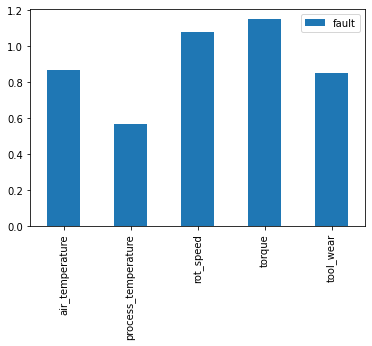

In [165]:
#num_columns

v= list()
for cati in ['air_temperature','process_temperature',"rot_speed","torque","tool_wear"]:
   v.append(mutual_info_score(df_train[cati], y_train))
cat_data_analy = pd.DataFrame(v,index= ['air_temperature','process_temperature',"rot_speed","torque","tool_wear"],columns = ['fault'])

cat_data_analy.plot.bar()
cat_data_analy


speed & torque seem to be most imporant, followed by the temperature

# Multi-class part!

In [364]:
#libraries
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) #import encoder

from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

#auc
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB


from sklearn.linear_model import RidgeClassifier


from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay


In [167]:
# Serialize non-numerical data using DictVectorizer (aka One-Hot Encoding)
train_dict = df_train.to_dict(orient='records') # get categorial variables from train db, sort them by x and put them into dictionary 
X_train = dv.fit_transform(train_dict) #one-hot encoding 
val_dict = df_val.to_dict(orient='records') #apply same 
X_val = dv.transform(val_dict)

## Decision Tree

[86.0, 90.66666666666666, 86.0, 86.0, 85.33333333333334, 80.0]

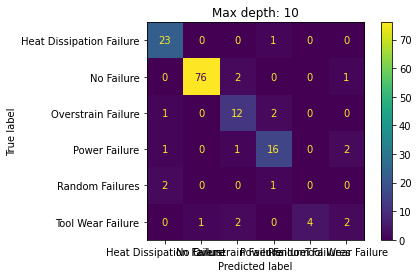

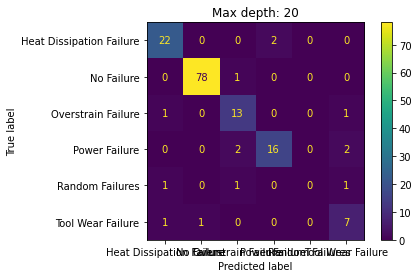

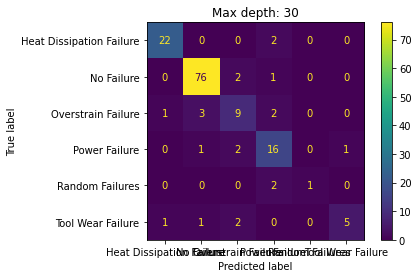

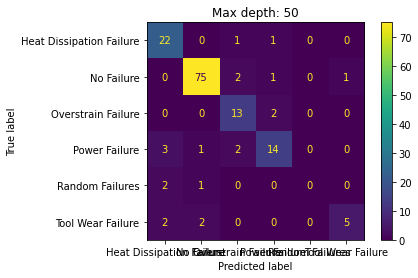

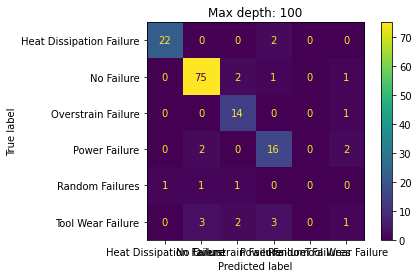

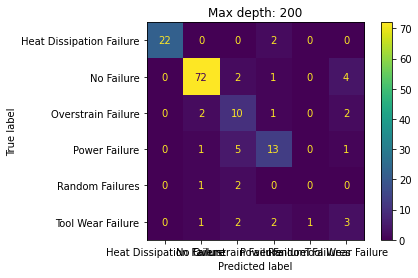

In [428]:
v = list()

for maxdep in [10,20,30,50,100,200]:
    
    dt = DecisionTreeClassifier(max_depth=maxdep,criterion='gini',splitter='random')
    dt.fit(X_train,y_train)
    v.append( sum(dt.predict(X_val) == y_val) / len(y_val)*100)
    
    d = ConfusionMatrixDisplay.from_estimator(dt, X_val, y_val)
    d.ax_.set_title('Max depth: ' + str(maxdep))
v

max depth=20

[100.0, 92.0]

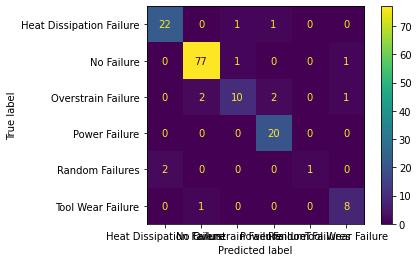

In [429]:
dt = make_pipeline(RobustScaler(),
                DecisionTreeClassifier(max_depth=20,criterion='gini',splitter='random'))
#dt = 
dt.fit(X_train,y_train)
v.append( sum(dt.predict(X_val) == y_val) / len(y_val)*100)

d = ConfusionMatrixDisplay.from_estimator(dt, X_val, y_val)
[sum(y_train==dt.predict(X_train))/len(y_train)*100,  sum(y_val==dt.predict(X_val))/len(y_val)*100]

## Decision Forest

In [430]:
#df_rf = pd.DataFrame(columns=['nestim','maxdepth','class','val','auc','f1'])
df_rf = pd.DataFrame(columns=['nestim','maxdepth','class','val'])
for max_dep in [1, 5, 7, 9, 10, 15, 20, 25]:
        for n_est in np.arange(1,100):
                rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, n_jobs=-1, random_state=1)
                rf.fit(X_train,y_train)
                y_predict = rf.predict(X_val)

                df_rf=df_rf.append(dict(zip(['nestim','maxdepth','class','val'], [n_est, max_dep ,sum(y_train==rf.predict(X_train))/len(y_train)*100,  sum(y_val==rf.predict(X_val))/len(y_val)*100])),ignore_index=True)
df_rf                

,nestim,maxdepth,class,val
0,1.0,1.0,53.229399,52.666667
1,2.0,1.0,53.229399,52.666667
2,3.0,1.0,53.229399,52.666667
3,4.0,1.0,53.229399,52.666667
4,5.0,1.0,53.229399,52.666667
...,...,...,...,...
787,95.0,25.0,99.777283,91.333333
788,96.0,25.0,99.777283,90.666667
789,97.0,25.0,99.777283,90.666667
790,98.0,25.0,99.777283,90.666667


In [431]:
df_rf.sort_values(by='val',ascending=False)

,nestim,maxdepth,class,val
753,61.0,25.0,99.777283,92.666667
751,59.0,25.0,99.777283,92.666667
754,62.0,25.0,99.777283,92.666667
752,60.0,25.0,99.777283,92.666667
738,46.0,25.0,99.777283,92.666667
...,...,...,...,...
70,71.0,1.0,53.006682,52.666667
71,72.0,1.0,53.006682,52.666667
72,73.0,1.0,53.006682,52.666667
73,74.0,1.0,53.006682,52.666667


Best DF classifier: nestim: 61.0	maxdep: 25.0	class:  99.083333 val:	92.66

[100.0, 92.0]

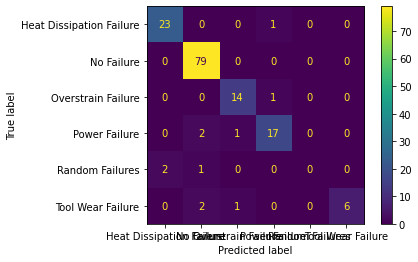

In [433]:
rf = RandomForestClassifier(n_estimators=59, max_depth=25, n_jobs=-1, random_state=1)
rf.fit(X_train,y_train)
#y_predict = rf.predict(X_val)
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val)
[sum(y_train==dt.predict(X_train))/len(y_train)*100,  sum(y_val==dt.predict(X_val))/len(y_val)*100]

## Extra Tree

In [370]:
#df_rf = pd.DataFrame(columns=['nestim','maxdepth','class','val','auc','f1'])
df_et = pd.DataFrame(columns=['nestim','maxdepth','class','val'])
for max_dep in [10, 20,25,30,40,50,60,75,100,200]:
        for n_est in np.logspace(1,3,10,dtype=int):
                
                et = make_pipeline(RobustScaler(), ExtraTreesClassifier(n_estimators=n_est, max_depth=max_dep, n_jobs=-1, random_state=1))
                et.fit(X_train,y_train)
                #y_predict = et.predict(X_val)

                df_et=df_et.append(dict(zip(['nestim','maxdepth','class','val'], [n_est, max_dep ,sum(y_train==et.predict(X_train))/len(y_train)*100,  sum(y_val==et.predict(X_val))/len(y_val)*100])),ignore_index=True)
df_et.sort_values(by='val',ascending=False)                



,nestim,maxdepth,class,val
53,46.0,50.0,100.000000,87.333333
44,77.0,40.0,100.000000,86.666667
52,27.0,50.0,100.000000,86.666667
73,46.0,75.0,100.000000,86.666667
79,1000.0,75.0,100.000000,86.666667
...,...,...,...,...
3,46.0,10.0,58.351893,54.666667
0,10.0,10.0,63.919822,54.666667
1,16.0,10.0,58.129176,54.000000
5,129.0,10.0,57.461024,54.000000


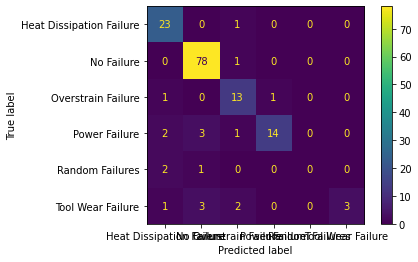

In [371]:
et = ExtraTreesClassifier(n_estimators=46, max_depth=50, n_jobs=-1, random_state=1)
et.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(et, X_val, y_val)

## KNN

[88.41870824053451, 83.33333333333334]

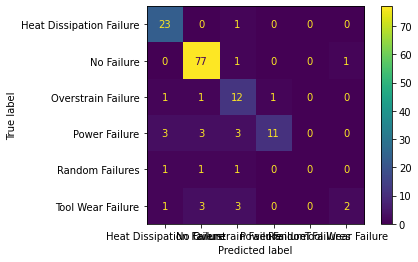

In [373]:
knn = make_pipeline(RobustScaler(),KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train,y_train)
#y_predict = rf.predict(X_val)
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)

[sum(y_train==knn.predict(X_train))/len(y_train)*100,  sum(y_val==knn.predict(X_val))/len(y_val)*100]

In [374]:
df_knn = pd.DataFrame(columns=['nbrs','class','val'])
for nn in np.arange(5,100,2):
    knn = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors=nn))
    knn.fit(X_train,y_train)
    df_knn=df_knn.append(dict(zip(['nbrs','class','val'], [nn ,sum(y_train==knn.predict(X_train))/len(y_train)*100,  sum(y_val==knn.predict(X_val))/len(y_val)*100])),ignore_index=True)
    #ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)
df_knn.sort_values(by='val',ascending=False)

,nbrs,class,val
0,5.0,88.418708,83.333333
2,9.0,85.300668,83.333333
1,7.0,86.414254,82.666667
3,11.0,84.409800,82.000000
4,13.0,83.073497,81.333333
6,17.0,82.850780,80.000000
5,15.0,82.628062,79.333333
7,19.0,81.737194,78.000000
9,23.0,79.287305,76.666667
8,21.0,80.846325,75.333333


Best for 5 neighbors

[88.41870824053451, 83.33333333333334]

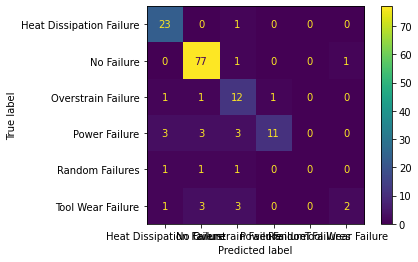

In [376]:
knn = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)

[sum(y_train==knn.predict(X_train))/len(y_train)*100,  sum(y_val==knn.predict(X_val))/len(y_val)*100]

## Bayes

In [378]:
df_by = pd.DataFrame(columns=['smoothing','class','val'])
for smth in np.logspace(-20,-1,50):
    by = GaussianNB(var_smoothing=smth)
    by.fit(X_train,y_train)
    df_by=df_by.append(dict(zip(['smoothing','class','val'], [smth ,sum(y_train==by.predict(X_train))/len(y_train)*100,  sum(y_val==by.predict(X_val))/len(y_val)*100])),ignore_index=True)
    #ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)
df_by.sort_values(by='val',ascending=False)

,smoothing,class,val
37,2.222996e-06,89.086860,86.000000
38,5.428675e-06,87.305122,85.333333
36,9.102982e-07,91.759465,85.333333
39,1.325711e-05,85.746102,83.333333
40,3.237458e-05,82.405345,81.333333
41,7.906043e-05,79.287305,77.333333
45,2.811769e-03,69.710468,74.666667
48,4.094915e-02,69.265033,74.000000
43,4.714866e-04,72.828508,74.000000
42,1.930698e-04,74.387528,74.000000


Best smooth factor around 2.22e-6

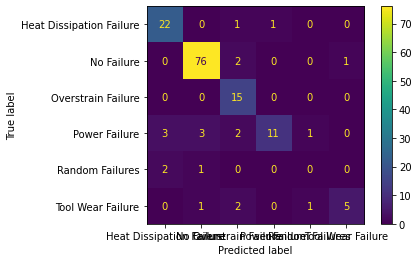

In [189]:
by = GaussianNB(var_smoothing=2.22e-6)
by.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(by, X_val, y_val)

## Linear Classifier

In [380]:
df_rc = pd.DataFrame(columns=['smoothing','class','val'])
for alph in np.logspace(-5,5,13):
    rc = RidgeClassifier(alpha=alph, normalize=False)
    rc.fit(X_train,y_train)
    df_rc=df_rc.append(dict(zip(['smoothing','class','val'], [alph ,sum(y_train==rc.predict(X_train))/len(y_train)*100,  sum(y_val==rc.predict(X_val))/len(y_val)*100])),ignore_index=True)
    #ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)
df_rc.sort_values(by='val',ascending=False)


C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler in

,smoothing,class,val
9,316.227766,83.518931,82.666667
0,0.000010,100.000000,82.000000
1,0.000068,100.000000,82.000000
2,0.000464,100.000000,82.000000
3,0.003162,100.000000,82.000000
4,0.021544,100.000000,82.000000
5,0.146780,100.000000,82.000000
6,1.000000,99.777283,82.000000
7,6.812921,88.641425,82.000000
8,46.415888,84.187082,82.000000


C:\Users\kay_t\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


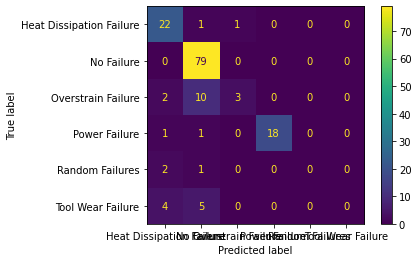

In [381]:
rc = RidgeClassifier(alpha=400, normalize=False)
rc.fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(rc, X_val, y_val)


## Neural Network

In [382]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.wrappers.scikit_learn import KerasClassifier

In [383]:
def build_model(optimizer='adam', init='normal'):
    model = models.Sequential()
    model.add(layers.Dense(9,use_bias=True, kernel_initializer=init))
    model.add(layers.LayerNormalization(axis=1))
    model.add(layers.Dense(6, activation='softmax'))
    #model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
kr = KerasClassifier(build_fn=build_model)

C:\Users\kay_t\AppData\Local\Temp/ipykernel_50436/2751352491.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  kr = KerasClassifier(build_fn=build_model)


C:\Users\kay_t\AppData\Local\Temp/ipykernel_50436/2603338624.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  kr2 = make_pipeline(RobustScaler(),KerasClassifier(build_fn=build_model,epochs=300,batch_size=20,verbose=False))


[100.0, 87.33333333333333]

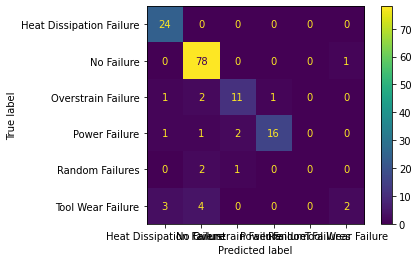

In [512]:
kr2 = make_pipeline(RobustScaler(),KerasClassifier(build_fn=build_model,epochs=300,batch_size=20,verbose=False))
kr2.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_val,kr2.predict(X_val))
[sum(y_train==kr2.predict(X_train))/len(y_train)*100,  sum(y_val==kr2.predict(X_val))/len(y_val)*100]

In [337]:
from sklearn.model_selection import GridSearchCV

In [513]:
model = KerasClassifier(build_fn=build_model,verbose=1)
optimizers = ['adam','adamax','rmsprop', 'SGD']
epochs = np.array([100,200])
batches = np.array([16,32,64])
init = ['glorot_uniform',
        'uniform',
        'normal'
       ]
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

C:\Users\kay_t\AppData\Local\Temp/ipykernel_50436/1217269252.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=build_model,verbose=1)


29/29 [==============================] - 1s 1ms/step - loss: 1.5465 - accuracy: 0.4967


In [514]:
grid_result.best_params_

{'batch_size': 16,
 'init': 'glorot_uniform',
 'nb_epoch': 100,
 'optimizer': 'SGD'}

C:\Users\kay_t\AppData\Local\Temp/ipykernel_50436/2906496052.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  kr2 = KerasClassifier(build_fn=build_model,epochs=500,batch_size=32,verbose=False,optimizer='adam',init='uniform')


[99.77728285077951, 80.0]

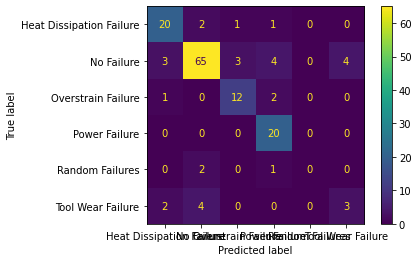

In [437]:
def build_model(optimizer='adam', init='normal'):
    model = models.Sequential()
    model.add(layers.Dense(9,use_bias=True, kernel_initializer=init))
    model.add(layers.LayerNormalization(axis=1))
    model.add(layers.Dense(6, activation='softmax'))
    #model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

kr2 = KerasClassifier(build_fn=build_model,epochs=500,batch_size=32,verbose=False,optimizer='adam',init='uniform')
kr2.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_val,kr2.predict(X_val))
[sum(y_train==kr2.predict(X_train))/len(y_train)*100,  sum(y_val==kr2.predict(X_val))/len(y_val)*100]

## Linear SVC

[100.0, 89.33333333333333]

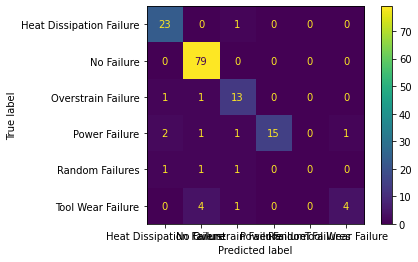

In [388]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(RobustScaler(),
                     LinearSVC(random_state=0, tol=1e-2))
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_val,clf.predict(X_val))
[sum(y_train==clf.predict(X_train))/len(y_train)*100,  sum(y_val==clf.predict(X_val))/len(y_val)*100]

## Extra Ensemble Classifier

## Voting

[100.0, 90.66666666666666]

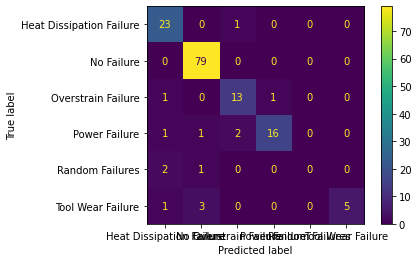

In [439]:
from sklearn.ensemble import VotingClassifier

kr2._estimator_type='classifier'
eclf1 = VotingClassifier(estimators=[
       ('dt', dt), ('rf', rf),('svc',clf),('nn',kr2)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)       
ConfusionMatrixDisplay.from_predictions(y_val,eclf1.predict(X_val))
[sum(y_train==eclf1.predict(X_train))/len(y_train)*100,  sum(y_val==eclf1.predict(X_val))/len(y_val)*100]

In [405]:
kr2

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kerasclassifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C73CB63C40>)])

## Stacking Clf

[99.10913140311804, 93.33333333333333]

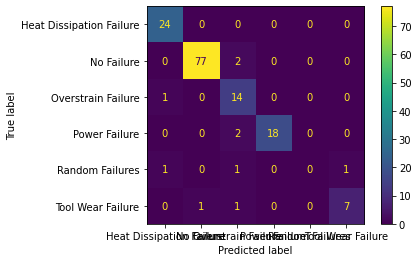

In [447]:
from sklearn.ensemble import StackingClassifier
stck = StackingClassifier(
     estimators=[
       ('dt', dt), ('rf', rf),('svc',clf),('nn',kr2)], final_estimator=rf)
stck = stck.fit(X_train, y_train)       
ConfusionMatrixDisplay.from_predictions(y_val,stck.predict(X_val))
[sum(y_train==stck.predict(X_train))/len(y_train)*100,  sum(y_val==stck.predict(X_val))/len(y_val)*100]

[98.21826280623608, 94.0]

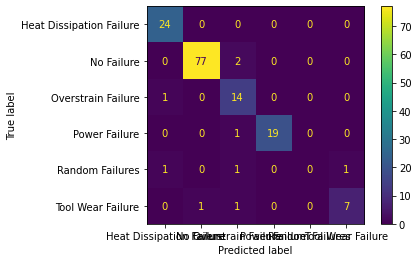

In [442]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X_val,y_val)

from sklearn.ensemble import StackingClassifier
stck = StackingClassifier(
     estimators=[
       ('dt', dt), ('rf', rf),('svc',clf),('nn',kr2)], final_estimator=rf,cv=kf)
stck = stck.fit(X_train, y_train)       
ConfusionMatrixDisplay.from_predictions(y_val,stck.predict(X_val))
[sum(y_train==stck.predict(X_train))/len(y_train)*100,  sum(y_val==stck.predict(X_val))/len(y_val)*100]

## Stack without NN (cause NN causes error)

[98.88641425389754, 93.33333333333333]

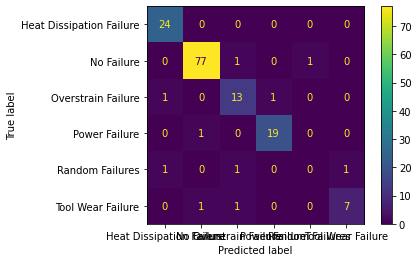

In [472]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X_val,y_val)

from sklearn.ensemble import StackingClassifier
stck = StackingClassifier(
     estimators=[
       ('dt', dt), ('rf', rf),('svc',clf)], final_estimator=rf,cv=kf)
stck = stck.fit(X_train, y_train)       
ConfusionMatrixDisplay.from_predictions(y_val,stck.predict(X_val))
[sum(y_train==stck.predict(X_train))/len(y_train)*100,  sum(y_val==stck.predict(X_val))/len(y_val)*100]

## Summary

|                           | Stacking | Stacking without NN | Voting | Linear SVC | NN   | Ridge | Bayes | KNN   | ExtraTree | DecisionTree | Random Forest |
|---------------------------|----------|---------------------|--------|------------|------|-------|-------|-------|-----------|--------------|---------------|
| Classification   Accuracy | 87.21    | 98.88               |100    | 100        | 99.7 | 83.51 | 89.08 | 88.41 | 100       | 100          | 100           |
| Validation   Accuracy     | 94       | 93.33               |90.66  | 89.33      | 80   | 82.66 | 86    | 83.33 | 87.33     | 92           | 92            |

Stacking classifier provides the best validation accuracy of 94%; it's therefore selected

However it's NOT exportable... I have tried pickle/cpickle/dill/%store/gzip+py-ubjson, none has worked
Therefore, I have chosen Stacking without NN (93.33 vs 94 is not big deal)

## Export pickle

In [474]:
import pickle
with open('model.bin','wb') as f: pickle.dump(stck,f)
with open("dv.bin", 'wb') as f: pickle.dump(dv,f)

In [477]:
# with open('df_test.bin','wb') as f: pickle.dump(df_test,f)
with open('y_test.bin','wb') as f: pickle.dump(y_test,f)

#

In [476]:
df_test

,product_id,type,air_temperature,process_temperature,rot_speed,torque,tool_wear
0,M24735,M,298.9,309.8,1363,50.6,115
1,M24777,M,298.5,308.8,1557,36.0,21
2,L56845,L,299.2,310.3,1610,33.3,233
3,M24646,M,298.7,309.6,1738,27.3,79
4,L50759,L,301.8,310.6,2672,11.8,124
...,...,...,...,...,...,...,...
145,M24651,M,298.5,309.4,1521,37.5,94
146,M24849,M,298.8,308.5,1577,33.2,0
147,L56949,L,298.6,309.6,1386,48.6,25
148,L50864,L,302.0,311.2,1270,65.3,182


## Tester (predict_tester.py)

In [504]:

import requests
#import json
import pickle

with open("predictTesterLocal/df_test.bin", 'rb') as f: df_test = pickle.load(f)
with open("predictTesterLocal/y_test.bin", 'rb') as f: y_test = pickle.load(f)



id =  13
try:
    id = int(id)
    example = df_test.iloc[id].to_json()
    expected_res = y_test[id]


    url = "http://127.0.0.1:9696/predict"
    results = requests.post(url, json=example).json()
    print("error_type of %d : %s" % (id, results["fail_type"]))

    print("(Real Database results: %s )" % expected_res)
except Exception as e:
    print(e)

error_type of 13 : Heat Dissipation Failure
(Real Database results: Heat Dissipation Failure )


# Cloud

In [511]:
# client.py: get data of the new user
import requests
import json

id = 11 #select here an id to test!
example = df_test.iloc[id].to_json()
expected_res = y_test[id]

url="https://kallelay.eu.pythonanywhere.com/predict"
results = requests.post(url, json=example).json()
fail_type = results["fail_type"]
print("failure type for ID %d : %s" % (id, fail_type))



failure type for ID 11 : No Failure
